### DATA PREPROCESSING

In [96]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

company = pd.read_csv('/Users/ayseljafarova/Desktop/technocolab/companies.csv')

In [97]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196530 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [98]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [99]:
company['name'].value_counts()

name
L                           8
Universit                   7
T                           7
IBM                         6
B                           6
                           ..
Bancroft Capital            1
OurHouse.com                1
Budget Rent Car             1
Casual Games Association    1
Closet Couture              1
Name: count, Length: 196347, dtype: int64

In [100]:
name_counts = company['name'].value_counts()
multiple_counts = name_counts[name_counts > 1]
percentage = (len(multiple_counts) / len(name_counts)) * 100

print(f"Percentage of companies appearing more than once: {percentage:.2f}%")

Percentage of companies appearing more than once: 0.07%


In [101]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [102]:
#Filtering out companies with multiple status
grouped = company.groupby('name')['status'].nunique()

# Filtering companies with more than one unique status
multiple_status_companies = grouped[grouped > 1].index

# Select relevant columns
result = company[company['name'].isin(multiple_status_companies)][['name', 'status']]
result

,name,status
1362,Genentech,ipo
3156,Johnson & Johnson,ipo
3543,Microsoft,ipo
14960,Pfizer,ipo
28377,Dell,operating
52406,Openwave,acquired
56583,Genentech,operating
56803,Openwave,operating
58577,Covidien,operating
58670,Medtronic,operating


In [103]:
for name in multiple_status_companies:
    statuses = result[result['name'] == name]['status'].unique()
    print(f"Company: {name}, Statuses: {list(statuses)}")

print("Number of companies duplicated according to the status", result.shape)

Company: AMD, Statuses: ['operating', 'ipo']
Company: Accenture, Statuses: ['operating', 'ipo']
Company: Archiver, Statuses: ['operating', 'acquired']
Company: Buscap, Statuses: ['acquired', 'operating']
Company: Covidien, Statuses: ['operating', 'ipo']
Company: Dell, Statuses: ['operating', 'ipo']
Company: Genentech, Statuses: ['ipo', 'operating']
Company: IBM, Statuses: ['operating', 'ipo']
Company: Johnson & Johnson, Statuses: ['ipo', 'operating']
Company: Medtronic, Statuses: ['operating', 'ipo']
Company: Microsoft, Statuses: ['ipo', 'operating']
Company: Openwave, Statuses: ['acquired', 'operating']
Company: Pfizer, Statuses: ['ipo', 'operating']
Company: TRW, Statuses: ['operating', 'acquired']
Company: United Online, Statuses: ['operating', 'ipo']
Company: Yub, Statuses: ['operating', 'closed']
Company: ZDNet, Statuses: ['operating', 'acquired']
Number of companies duplicated according to the status (39, 2)


In [104]:
company = company[~company['name'].isin(multiple_status_companies)]

In [105]:
company.shape

(196514, 44)

In [106]:
columns_to_drop = ['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
   'created_at', 'updated_at','domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',
    'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',
    'invested_companies']
company = company.drop(columns=columns_to_drop)

company.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'state_code', 'city', 'region', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'lat', 'lng', 'ROI'],
      dtype='object')

### EDA of Categorical features

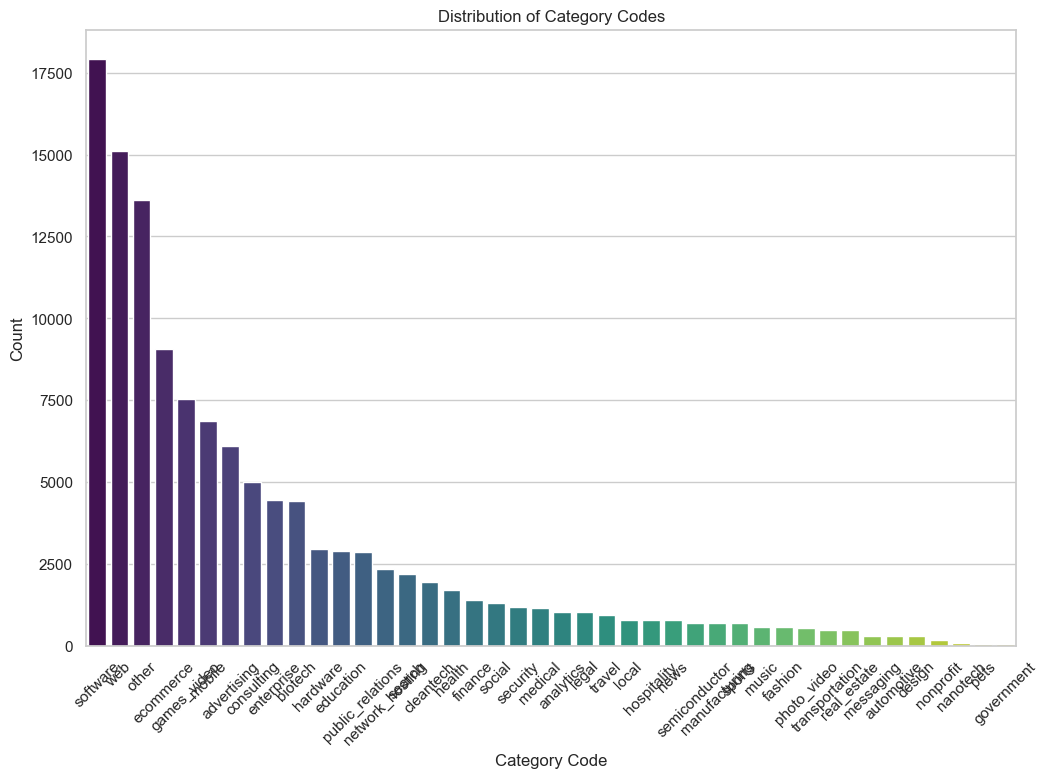

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
category_counts = company['category_code'].value_counts().reset_index()
category_counts.columns = ['category_code', 'count']
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='category_code', y='count', data=category_counts, palette='viridis')
plt.title('Distribution of Category Codes')
plt.xlabel('Category Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

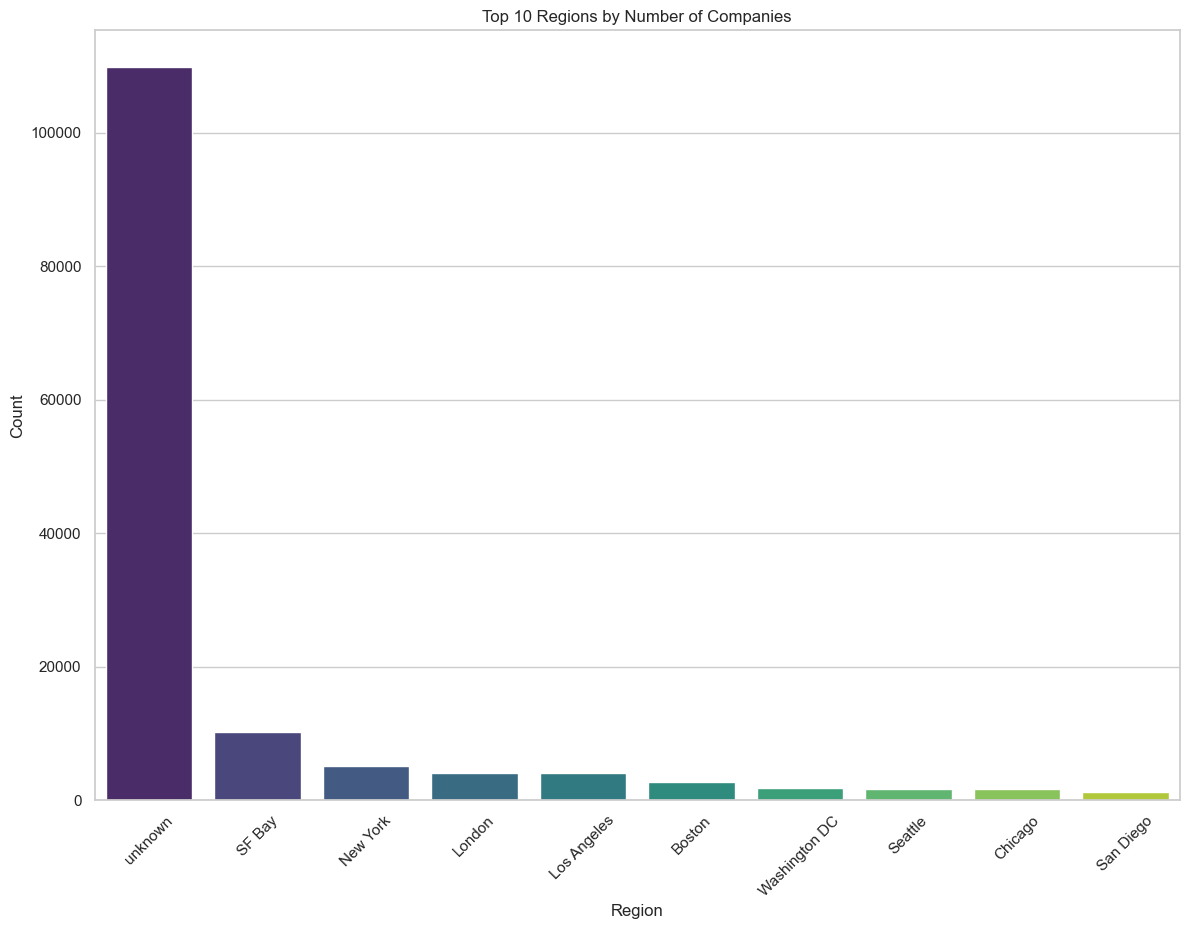

In [108]:
region_counts = company['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']
top_10_region_counts = region_counts.head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
sns.barplot(x='region', y='count', data=top_10_region_counts, palette='viridis')
plt.title('Top 10 Regions by Number of Companies')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

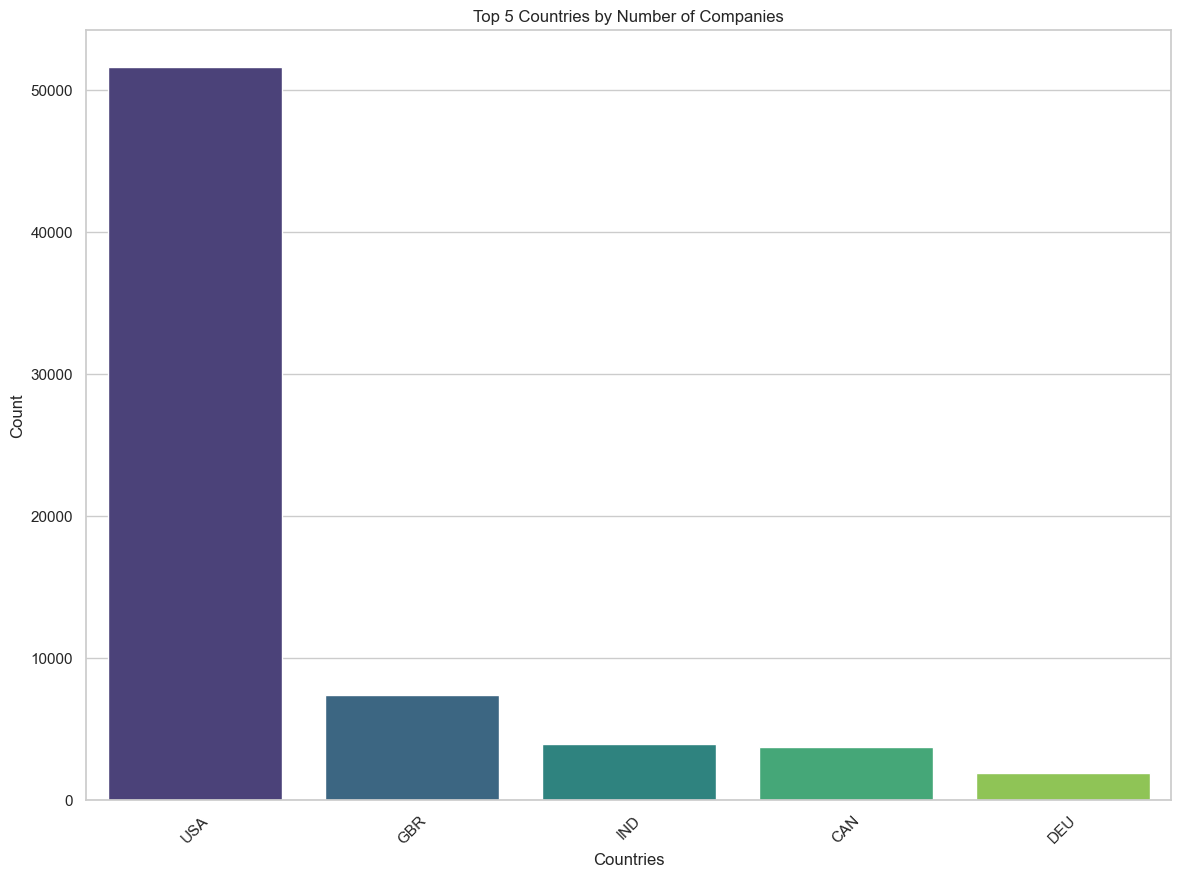

Majority of the companies are from USA, followed by GBR, CAN, FRA and DEU.


In [109]:

country_counts = company['country_code'].value_counts().reset_index()
country_counts.columns = ['country_code', 'count']
top_5_country_counts = country_counts.head(5)
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
sns.barplot(x='country_code', y='count', data=top_5_country_counts, palette='viridis')
plt.title('Top 5 Countries by Number of Companies')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print("Majority of the companies are from USA, followed by GBR, CAN, FRA and DEU.")

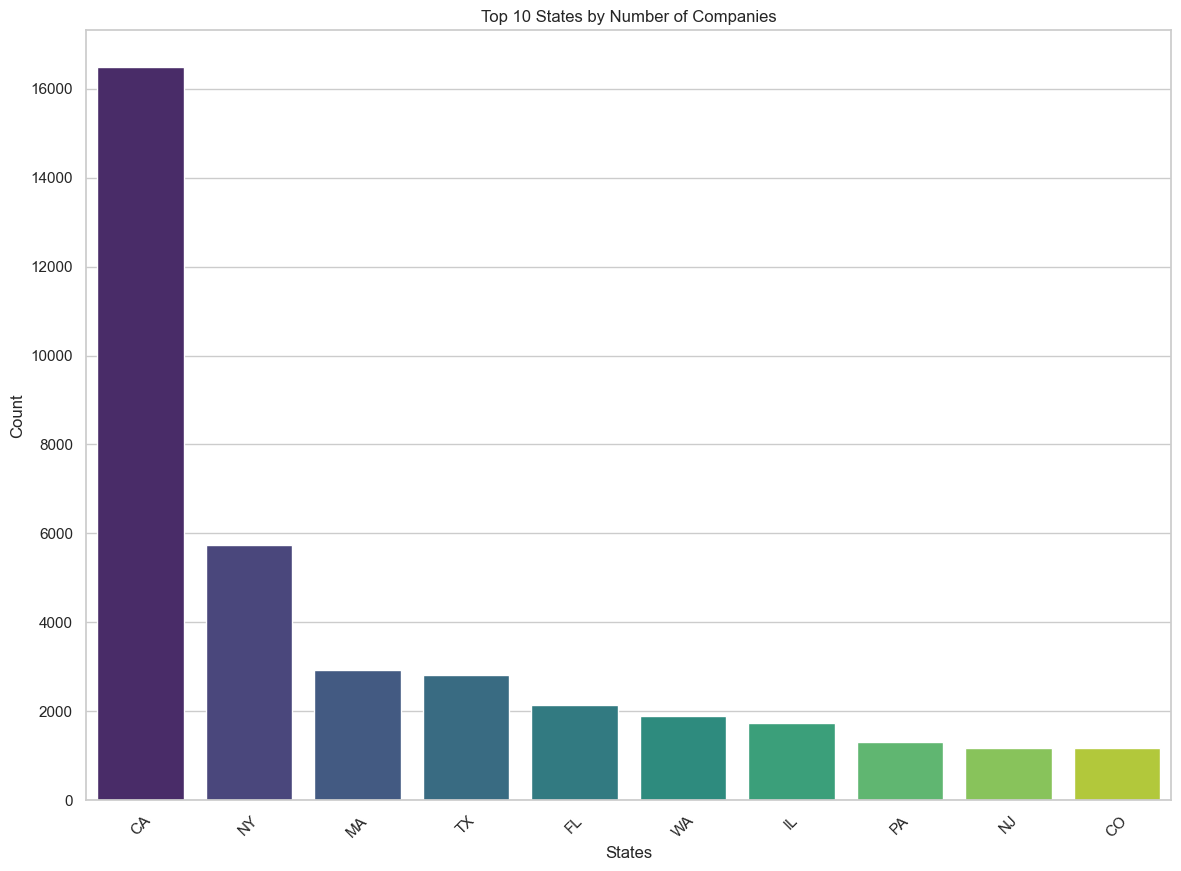

Majority of the companies are from CA, followed by NY, MA, TX and WA.


In [110]:
state_counts = company['state_code'].value_counts().reset_index()
state_counts.columns = ['state_code', 'count']

top_10_state_counts = state_counts.head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
sns.barplot(x='state_code', y='count', data=top_10_state_counts, palette='viridis')
plt.title('Top 10 States by Number of Companies')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print("Majority of the companies are from CA, followed by NY, MA, TX and WA.")

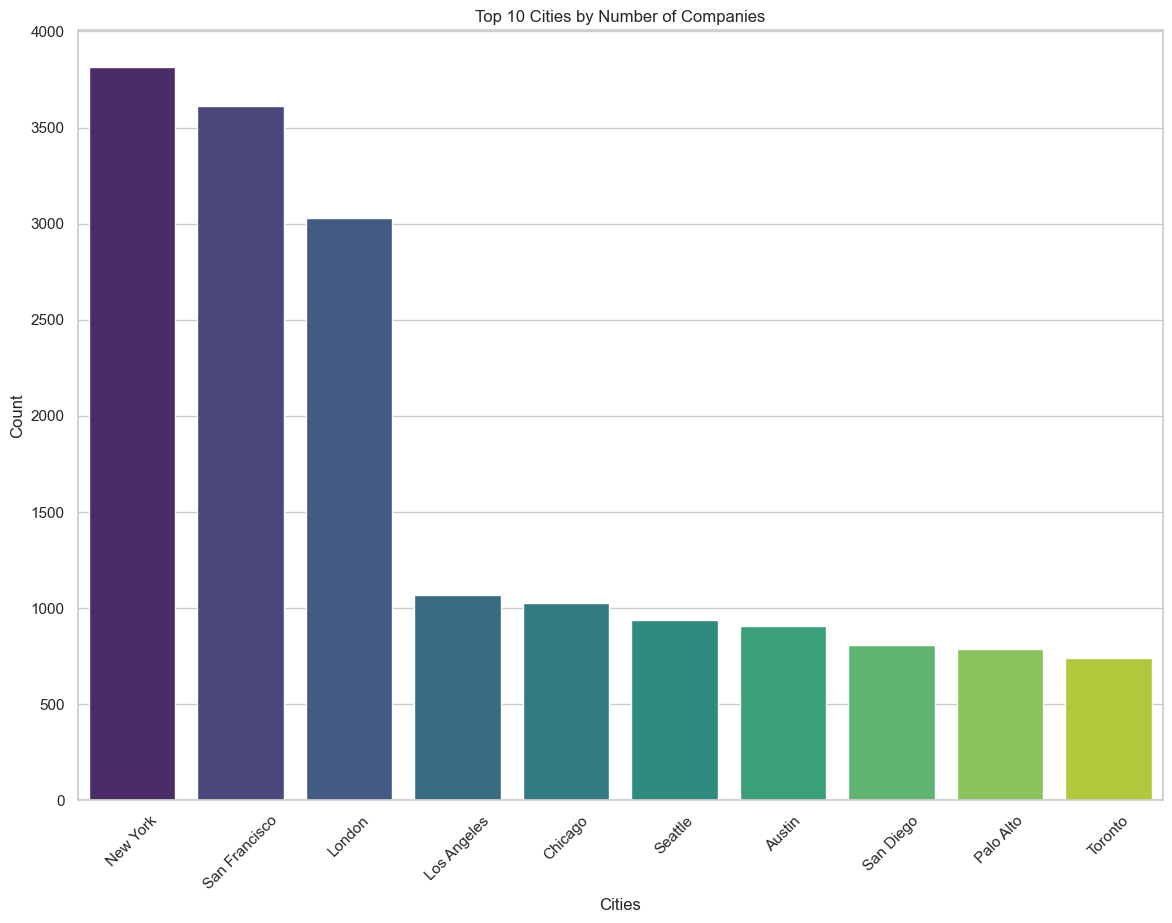

Top 3 cities where companies are located are San Francisco, New York and London.


In [111]:
city_counts = company['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']
top_10_city_counts = city_counts.head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
sns.barplot(x='city', y='count', data=top_10_city_counts, palette='viridis')
plt.title('Top 10 Cities by Number of Companies')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print("Top 3 cities where companies are located are San Francisco, New York and London.")

##### We create 3 new features from states, countries and states

In [112]:
top_3_cities = company['city'].value_counts().head(3).index

# Creating a feature for the top 3 cities
company['top_3_cities'] = company['city'].apply(lambda x: 1 if x in top_3_cities else 0)

# Creating a new feature for USA and non-USA
company['usa_non_usa'] = company['country_code'].apply(lambda x: 1 if x == 'USA' else 0)

# Creating a feature for CA and non-CA
company['ca_non_ca'] = company['state_code'].apply(lambda x: 1 if x == 'CA' else 0)

company.head()

,category_code,status,founded_at,closed_at,country_code,state_code,city,region,first_investment_at,last_investment_at,...,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI,top_3_cities,usa_non_usa,ca_non_ca
0,web,operating,2005-10-17,NaN,USA,WA,Seattle,Seattle,NaN,NaN,...,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5,0,1,0
1,games_video,acquired,NaN,NaN,USA,CA,Culver City,Los Angeles,NaN,NaN,...,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN,0,1,1
2,games_video,acquired,NaN,NaN,USA,CA,San Mateo,SF Bay,NaN,NaN,...,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN,0,1,1
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


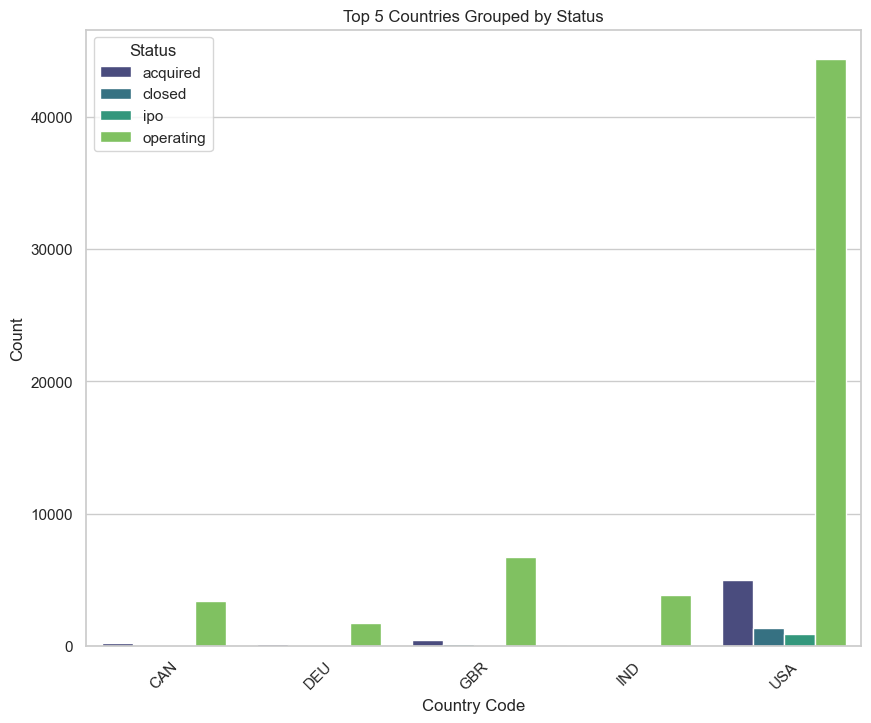

In [113]:
#Top 5 countries with most companies
country_status_counts = company.groupby(['country_code', 'status']).size().reset_index(name='count')
top_countries = country_status_counts.groupby('country_code')['count'].sum().nlargest(5).index
top_country_status_counts = country_status_counts[country_status_counts['country_code'].isin(top_countries)]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.barplot(x='country_code', y='count', hue='status', data=top_country_status_counts, palette='viridis')
plt.title('Top 5 Countries Grouped by Status')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

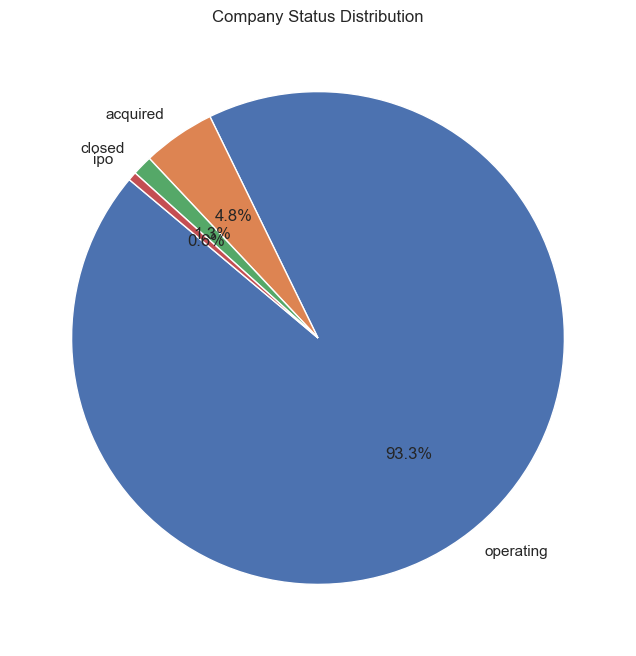

In [114]:

status_counts = company['status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Company Status Distribution')
plt.show()

##### Since USA was prominent in previous analysis we check distribution of companies in USA

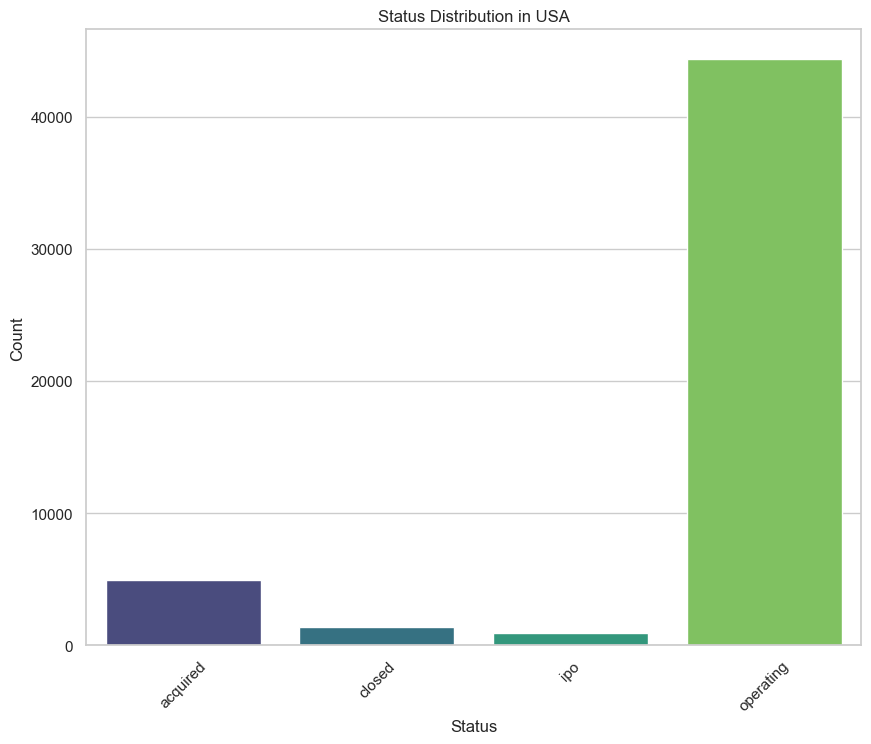

In [115]:
# USA data
usa_data = company[company['country_code'] == 'USA']
usa_status_counts = usa_data.groupby('status').size().reset_index(name='count')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.barplot(x='status', y='count', data=usa_status_counts, palette='viridis')
plt.title('Status Distribution in USA')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### Major categories of companies according to their status, Softwares is highest followed by others and web categories

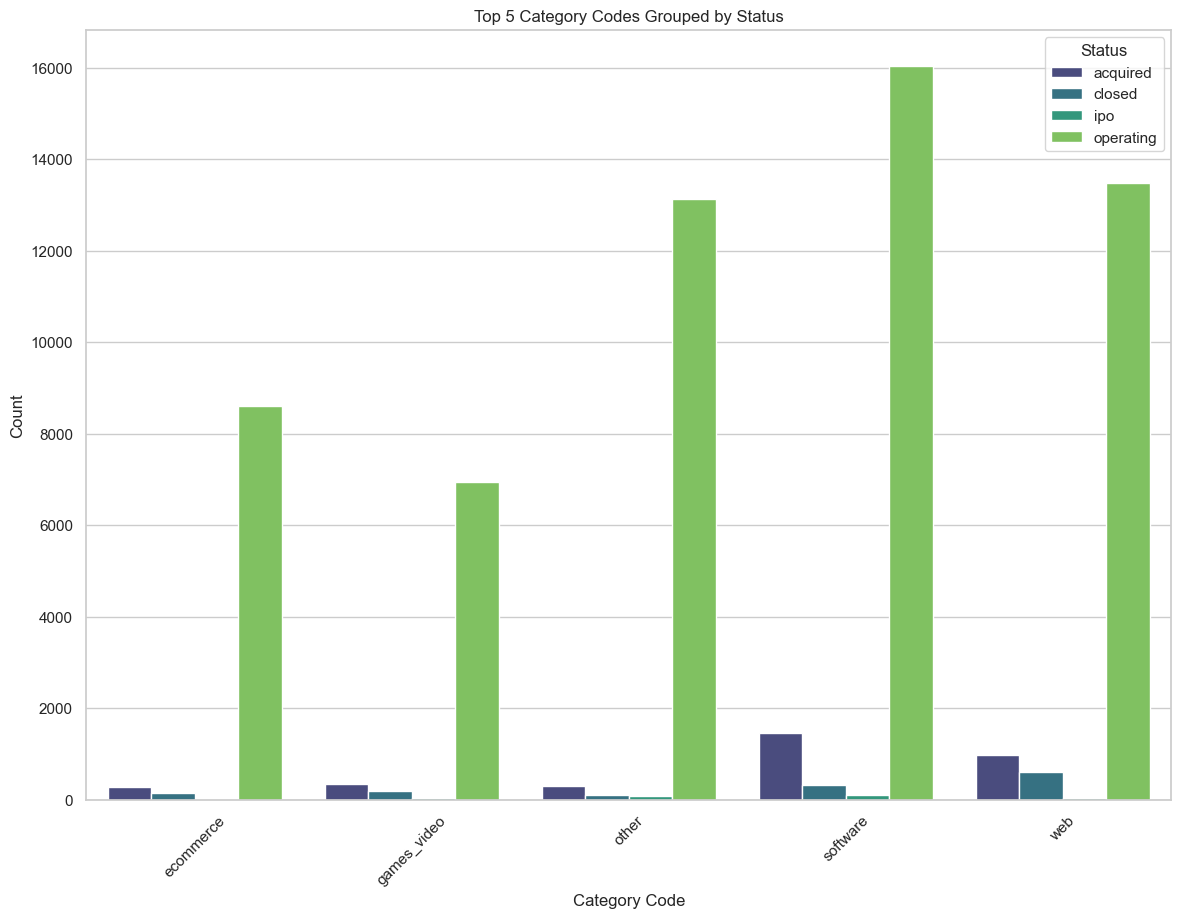

In [116]:
category_status_counts = company.groupby(['category_code', 'status']).size().reset_index(name='count')
top_categories = category_status_counts.groupby('category_code')['count'].sum().nlargest(5).index
top_category_status_counts = category_status_counts[category_status_counts['category_code'].isin(top_categories)]
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
sns.barplot(x='category_code', y='count', hue='status', data=top_category_status_counts, palette='viridis')
plt.title('Top 5 Category Codes Grouped by Status')
plt.xlabel('Category Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

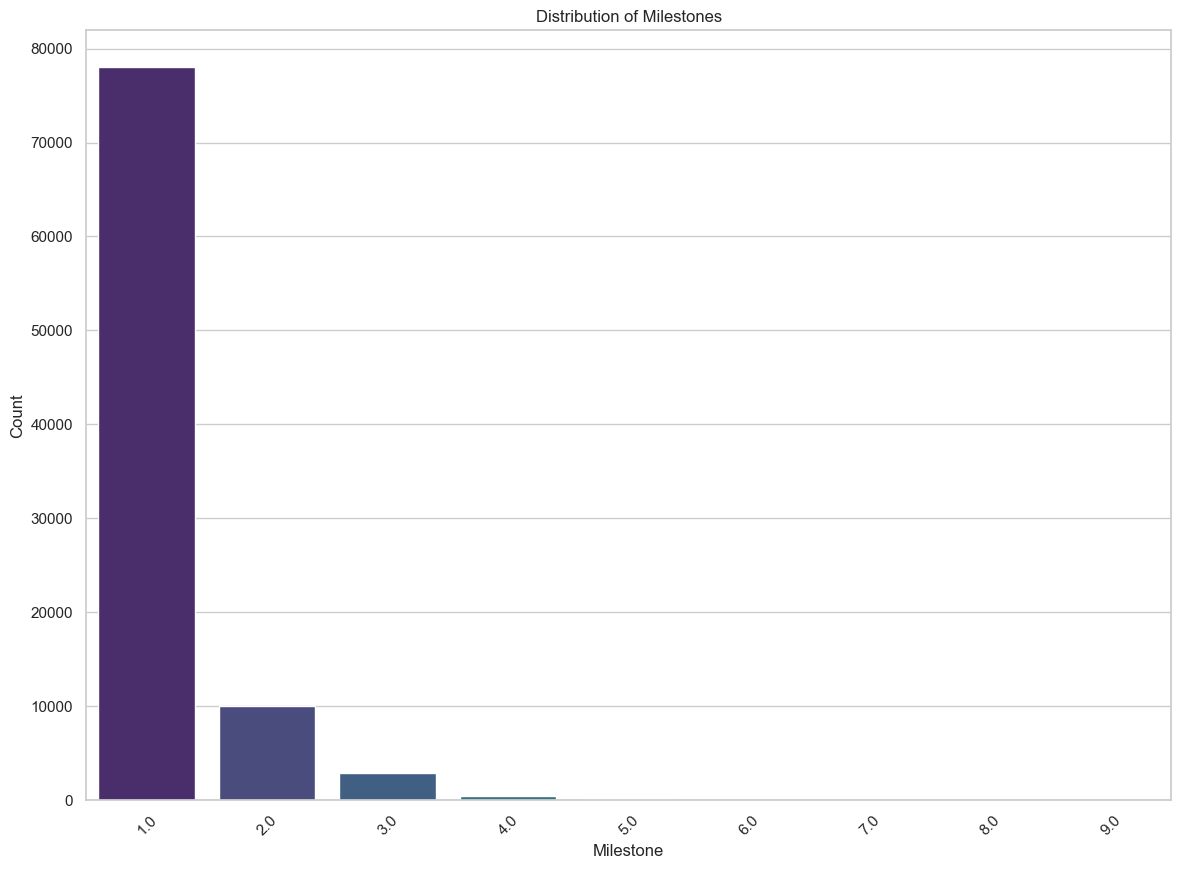

In [117]:

milestones_counts = company['milestones'].value_counts().reset_index()
milestones_counts.columns = ['milestone', 'count']
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
sns.barplot(x='milestone', y='count', data=milestones_counts, palette='viridis')
plt.title('Distribution of Milestones')
plt.xlabel('Milestone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


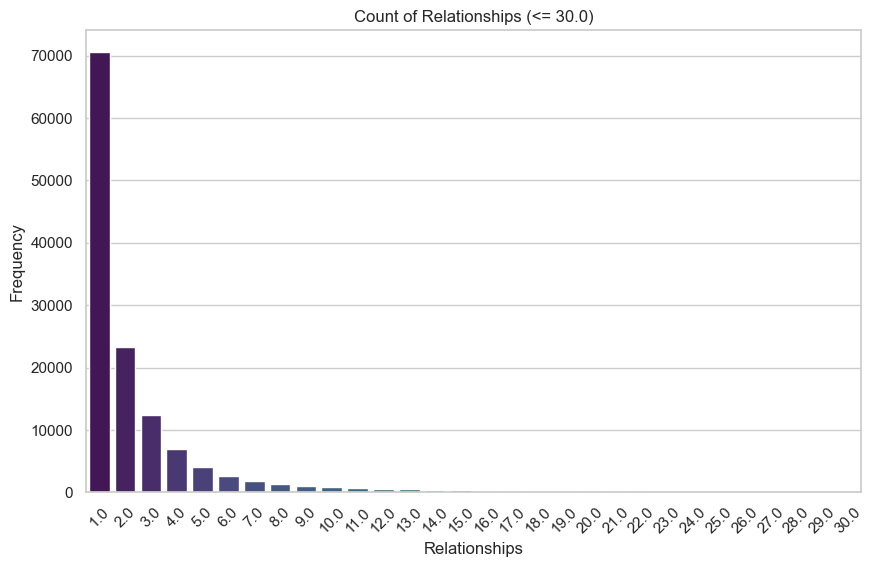

 Relationship 1.0 is more prominent than others.


In [118]:
filtered_company = company[company['relationships'] <= 30.0]
plt.figure(figsize=(10, 6))
sns.countplot(x=filtered_company['relationships'], palette='viridis')
plt.title('Count of Relationships (<= 30.0)')
plt.xlabel('Relationships')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
print(" Relationship 1.0 is more prominent than others.")

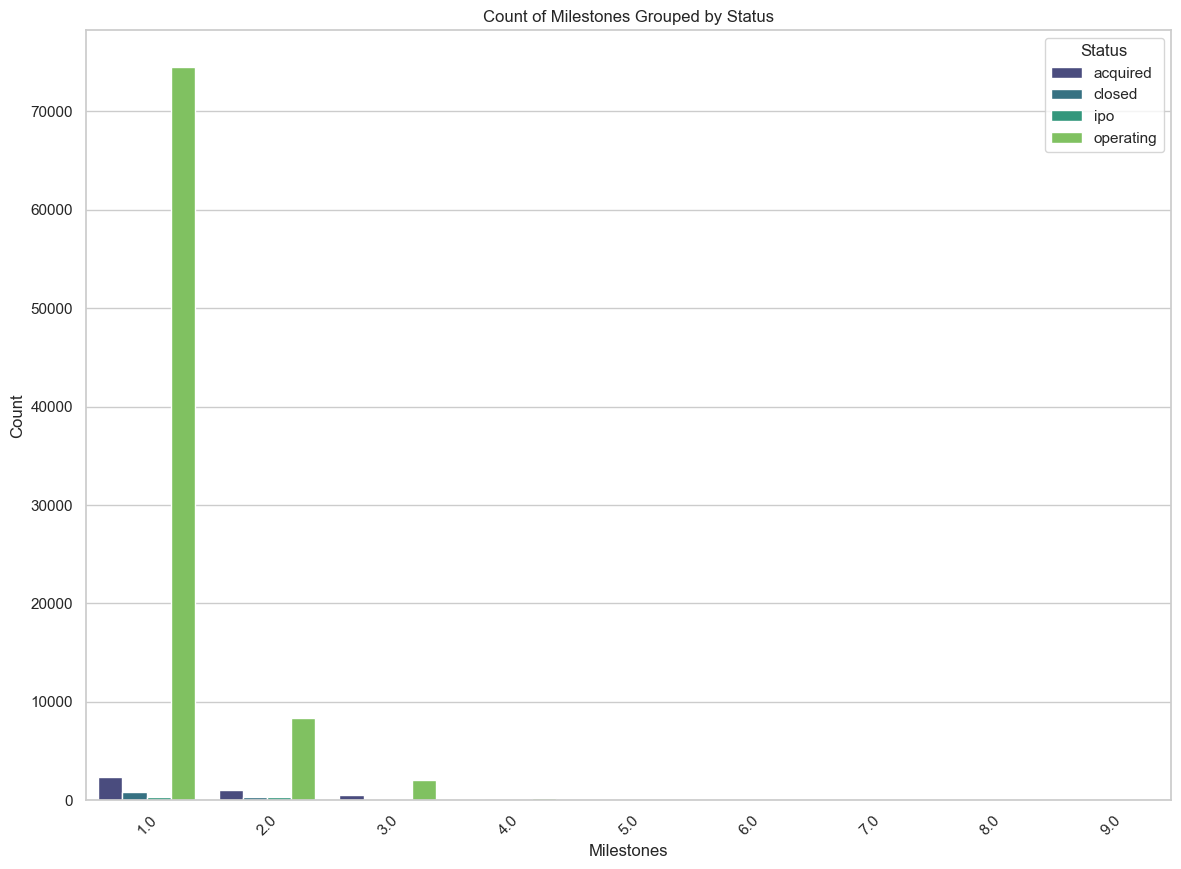

In [119]:

grouped_data = company.groupby(['status', 'milestones']).size().reset_index(name='count')
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
sns.barplot(x='milestones', y='count', hue='status', data=grouped_data, palette='viridis')
plt.title('Count of Milestones Grouped by Status')
plt.xlabel('Milestones')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

In [120]:
company.head()

,category_code,status,founded_at,closed_at,country_code,state_code,city,region,first_investment_at,last_investment_at,...,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI,top_3_cities,usa_non_usa,ca_non_ca
0,web,operating,2005-10-17,NaN,USA,WA,Seattle,Seattle,NaN,NaN,...,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5,0,1,0
1,games_video,acquired,NaN,NaN,USA,CA,Culver City,Los Angeles,NaN,NaN,...,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN,0,1,1
2,games_video,acquired,NaN,NaN,USA,CA,San Mateo,SF Bay,NaN,NaN,...,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN,0,1,1
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [121]:
company.duplicated().sum()
company.drop_duplicates(inplace=True)

In [122]:
threshold = 0.98

percentage_null = company.isnull().mean()

columns_to_drop = percentage_null[percentage_null > threshold].index
company= company.drop(columns=columns_to_drop)
company.shape

(109844, 24)

In [123]:
company.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'state_code', 'city', 'region', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'lat', 'lng', 'top_3_cities', 'usa_non_usa',
       'ca_non_ca'],
      dtype='object')

In [124]:

columns_to_check = ['status', 'country_code', 'category_code', 'founded_at']

company = company.dropna(subset=columns_to_check)
company.shape

(63650, 24)

##### Removing outliers

In [125]:
def remove_outliers(df, column):
	Q1 = df[column].quantile(0.25)
	Q3 = df[column].quantile(0.75)
	IQR = Q3 - Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


company = remove_outliers(company, 'funding_total_usd')

company = remove_outliers(company, 'funding_rounds')

company.shape

(16878, 24)

In [126]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16878 entries, 13 to 196552
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        16878 non-null  object 
 1   status               16878 non-null  object 
 2   founded_at           16878 non-null  object 
 3   closed_at            1070 non-null   object 
 4   country_code         16878 non-null  object 
 5   state_code           11331 non-null  object 
 6   city                 16435 non-null  object 
 7   region               16878 non-null  object 
 8   first_investment_at  105 non-null    object 
 9   last_investment_at   105 non-null    object 
 10  investment_rounds    105 non-null    float64
 11  first_funding_at     16827 non-null  object 
 12  last_funding_at      16827 non-null  object 
 13  funding_rounds       16878 non-null  float64
 14  funding_total_usd    16878 non-null  float64
 15  first_milestone_at   10052 non-null  ob

In [127]:


date_columns = ['first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at']


for column in date_columns:
	company[column] = pd.to_datetime(company[column], format='mixed', errors='coerce')
	company[column + '_year'] = company[column].dt.year.fillna(0).astype(int)

company.drop(columns=date_columns, inplace=True)
company.head()

,category_code,status,founded_at,closed_at,country_code,state_code,city,region,first_investment_at,last_investment_at,...,relationships,lat,lng,top_3_cities,usa_non_usa,ca_non_ca,first_funding_at_year,last_funding_at_year,first_milestone_at_year,last_milestone_at_year
13,web,acquired,2007-10-01,NaN,USA,CA,Mountain View,SF Bay,NaN,NaN,...,14.0,37.386052,-122.083851,0,1,1,2008,2008,2008,2012
20,cleantech,operating,2003-01-01,NaN,USA,TX,Austin,Austin,NaN,NaN,...,6.0,30.267153,-97.743061,0,1,0,2011,2012,2010,2010
26,mobile,operating,2003-11-01,NaN,AUS,NaN,Brisbane,SF Bay,NaN,NaN,...,2.0,-27.469771,153.025124,0,0,0,2003,2003,2007,2007
32,education,operating,2010-10-01,NaN,USA,NJ,NaN,New Jersey - Other,NaN,NaN,...,NaN,NaN,NaN,0,1,0,2011,2011,2010,2010
36,medical,operating,2006-01-01,NaN,USA,MA,West Bridgewater,West Bridgewater,NaN,NaN,...,2.0,42.018989,-71.007822,0,1,0,2011,2012,0,0


### Data generalisation

In [128]:

def generalize_column(df, column):
	top_3 = df[column].value_counts().nlargest(3).index
	df[column] = df[column].apply(lambda x: 1 if x in top_3 else 0)
	return df

company = generalize_column(company, 'category_code')
company.head()

,category_code,status,founded_at,closed_at,country_code,state_code,city,region,first_investment_at,last_investment_at,...,relationships,lat,lng,top_3_cities,usa_non_usa,ca_non_ca,first_funding_at_year,last_funding_at_year,first_milestone_at_year,last_milestone_at_year
13,1,acquired,2007-10-01,NaN,USA,CA,Mountain View,SF Bay,NaN,NaN,...,14.0,37.386052,-122.083851,0,1,1,2008,2008,2008,2012
20,0,operating,2003-01-01,NaN,USA,TX,Austin,Austin,NaN,NaN,...,6.0,30.267153,-97.743061,0,1,0,2011,2012,2010,2010
26,0,operating,2003-11-01,NaN,AUS,NaN,Brisbane,SF Bay,NaN,NaN,...,2.0,-27.469771,153.025124,0,0,0,2003,2003,2007,2007
32,0,operating,2010-10-01,NaN,USA,NJ,NaN,New Jersey - Other,NaN,NaN,...,NaN,NaN,NaN,0,1,0,2011,2011,2010,2010
36,0,operating,2006-01-01,NaN,USA,MA,West Bridgewater,West Bridgewater,NaN,NaN,...,2.0,42.018989,-71.007822,0,1,0,2011,2012,0,0


In [129]:
company["category_code"].value_counts()

category_code
0    10816
1     6062
Name: count, dtype: int64

In [130]:
company.head()
company.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16878 entries, 13 to 196552
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category_code            16878 non-null  int64  
 1   status                   16878 non-null  object 
 2   founded_at               16878 non-null  object 
 3   closed_at                1070 non-null   object 
 4   country_code             16878 non-null  object 
 5   state_code               11331 non-null  object 
 6   city                     16435 non-null  object 
 7   region                   16878 non-null  object 
 8   first_investment_at      105 non-null    object 
 9   last_investment_at       105 non-null    object 
 10  investment_rounds        105 non-null    float64
 11  funding_rounds           16878 non-null  float64
 12  funding_total_usd        16878 non-null  float64
 13  milestones               10052 non-null  float64
 14  relationships            

In [131]:
company.value_counts('status')

status
operating    14350
acquired      1339
closed        1056
ipo            133
Name: count, dtype: int64

In [132]:
company.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'state_code', 'city', 'region', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng',
       'top_3_cities', 'usa_non_usa', 'ca_non_ca', 'first_funding_at_year',
       'last_funding_at_year', 'first_milestone_at_year',
       'last_milestone_at_year'],
      dtype='object')

##### Creating "is_closed" feature

In [133]:
company['founded_at'] = pd.to_datetime(company['founded_at'], errors='coerce')
company['closed_at'] = pd.to_datetime(company['closed_at'], errors='coerce')
company['closed_at_year'] = pd.to_datetime(company['closed_at'], errors='coerce').dt.year.fillna(0).astype(int)
company['isClosed'] = False

company.loc[company['status'].isin(['acquired', 'closed']), 'isClosed'] = True

company.loc[company['closed_at_year'] != 0, 'isClosed'] = True

company['isClosed'] = company['isClosed'].astype(int)

company.head()

,category_code,status,founded_at,closed_at,country_code,state_code,city,region,first_investment_at,last_investment_at,...,lng,top_3_cities,usa_non_usa,ca_non_ca,first_funding_at_year,last_funding_at_year,first_milestone_at_year,last_milestone_at_year,closed_at_year,isClosed
13,1,acquired,2007-10-01,NaT,USA,CA,Mountain View,SF Bay,NaN,NaN,...,-122.083851,0,1,1,2008,2008,2008,2012,0,1
20,0,operating,2003-01-01,NaT,USA,TX,Austin,Austin,NaN,NaN,...,-97.743061,0,1,0,2011,2012,2010,2010,0,0
26,0,operating,2003-11-01,NaT,AUS,NaN,Brisbane,SF Bay,NaN,NaN,...,153.025124,0,0,0,2003,2003,2007,2007,0,0
32,0,operating,2010-10-01,NaT,USA,NJ,NaN,New Jersey - Other,NaN,NaN,...,NaN,0,1,0,2011,2011,2010,2010,0,0
36,0,operating,2006-01-01,NaT,USA,MA,West Bridgewater,West Bridgewater,NaN,NaN,...,-71.007822,0,1,0,2011,2012,0,0,0,0


##### Creating "duration_days" feature

In [134]:
company['duration_days'] = (company['closed_at'] - company['founded_at']).dt.days.fillna(0).astype(int)

In [135]:
company.head()

,category_code,status,founded_at,closed_at,country_code,state_code,city,region,first_investment_at,last_investment_at,...,top_3_cities,usa_non_usa,ca_non_ca,first_funding_at_year,last_funding_at_year,first_milestone_at_year,last_milestone_at_year,closed_at_year,isClosed,duration_days
13,1,acquired,2007-10-01,NaT,USA,CA,Mountain View,SF Bay,NaN,NaN,...,0,1,1,2008,2008,2008,2012,0,1,0
20,0,operating,2003-01-01,NaT,USA,TX,Austin,Austin,NaN,NaN,...,0,1,0,2011,2012,2010,2010,0,0,0
26,0,operating,2003-11-01,NaT,AUS,NaN,Brisbane,SF Bay,NaN,NaN,...,0,0,0,2003,2003,2007,2007,0,0,0
32,0,operating,2010-10-01,NaT,USA,NJ,NaN,New Jersey - Other,NaN,NaN,...,0,1,0,2011,2011,2010,2010,0,0,0
36,0,operating,2006-01-01,NaT,USA,MA,West Bridgewater,West Bridgewater,NaN,NaN,...,0,1,0,2011,2012,0,0,0,0,0


In [136]:
company['founded_at'] = company['founded_at'].dt.year
company.head()

,category_code,status,founded_at,closed_at,country_code,state_code,city,region,first_investment_at,last_investment_at,...,top_3_cities,usa_non_usa,ca_non_ca,first_funding_at_year,last_funding_at_year,first_milestone_at_year,last_milestone_at_year,closed_at_year,isClosed,duration_days
13,1,acquired,2007,NaT,USA,CA,Mountain View,SF Bay,NaN,NaN,...,0,1,1,2008,2008,2008,2012,0,1,0
20,0,operating,2003,NaT,USA,TX,Austin,Austin,NaN,NaN,...,0,1,0,2011,2012,2010,2010,0,0,0
26,0,operating,2003,NaT,AUS,NaN,Brisbane,SF Bay,NaN,NaN,...,0,0,0,2003,2003,2007,2007,0,0,0
32,0,operating,2010,NaT,USA,NJ,NaN,New Jersey - Other,NaN,NaN,...,0,1,0,2011,2011,2010,2010,0,0,0
36,0,operating,2006,NaT,USA,MA,West Bridgewater,West Bridgewater,NaN,NaN,...,0,1,0,2011,2012,0,0,0,0,0


In [137]:
company = company.drop("closed_at", axis=1)

In [138]:
company['first_investment_at'] = pd.to_datetime(company['first_investment_at'])
company['last_investment_at'] = pd.to_datetime(company['last_investment_at'])
company['first_investment_at'] = company['first_investment_at'].dt.year
company['last_investment_at'] = company['last_investment_at'].dt.year

company.head()

,category_code,status,founded_at,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,...,top_3_cities,usa_non_usa,ca_non_ca,first_funding_at_year,last_funding_at_year,first_milestone_at_year,last_milestone_at_year,closed_at_year,isClosed,duration_days
13,1,acquired,2007,USA,CA,Mountain View,SF Bay,NaN,NaN,NaN,...,0,1,1,2008,2008,2008,2012,0,1,0
20,0,operating,2003,USA,TX,Austin,Austin,NaN,NaN,NaN,...,0,1,0,2011,2012,2010,2010,0,0,0
26,0,operating,2003,AUS,NaN,Brisbane,SF Bay,NaN,NaN,NaN,...,0,0,0,2003,2003,2007,2007,0,0,0
32,0,operating,2010,USA,NJ,NaN,New Jersey - Other,NaN,NaN,NaN,...,0,1,0,2011,2011,2010,2010,0,0,0
36,0,operating,2006,USA,MA,West Bridgewater,West Bridgewater,NaN,NaN,NaN,...,0,1,0,2011,2012,0,0,0,0,0


#### Extracting year of "founded_at" column as a feature on same column

In [139]:
to_drop = ['city', 'state_code', 'region',"country_code",]
company = company.drop(columns=to_drop)

company.columns

Index(['category_code', 'status', 'founded_at', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng',
       'top_3_cities', 'usa_non_usa', 'ca_non_ca', 'first_funding_at_year',
       'last_funding_at_year', 'first_milestone_at_year',
       'last_milestone_at_year', 'closed_at_year', 'isClosed',
       'duration_days'],
      dtype='object')

In [140]:
print(company['relationships'].unique())

[1.400e+01 6.000e+00 2.000e+00       nan 8.000e+00 7.000e+00 5.000e+00
 1.900e+01 1.000e+00 3.000e+00 4.000e+00 9.000e+00 1.200e+01 1.300e+01
 1.100e+01 1.600e+01 1.000e+01 6.600e+01 1.500e+01 2.200e+01 1.700e+01
 2.100e+01 3.000e+01 2.000e+01 2.300e+01 1.800e+01 2.700e+01 2.400e+01
 3.600e+01 2.500e+01 6.300e+01 7.000e+01 2.800e+01 2.900e+01 4.500e+01
 8.000e+01 2.600e+01 7.800e+01 3.900e+01 3.200e+01 3.240e+02 6.800e+01
 4.000e+01 3.300e+01 1.630e+02 6.400e+01 3.100e+01 5.470e+02 9.820e+02
 3.700e+01 2.460e+02 4.400e+01 5.000e+01 1.410e+02 5.400e+01 6.200e+01
 5.100e+01 3.500e+01 3.400e+01 1.046e+03 4.300e+01 4.600e+01 4.800e+01
 7.300e+01 9.300e+01 6.000e+01 6.700e+01]


In [141]:
numerical_columns = ["investment_rounds", "funding_rounds", "funding_total_usd","milestones","relationships","lat","lng"]
summary_statistics = company[numerical_columns].describe()
print(summary_statistics)

       investment_rounds  funding_rounds  funding_total_usd    milestones  \
count         105.000000    16878.000000       1.687800e+04  10052.000000   
mean           10.085714        1.469131       4.561255e+06      1.593713   
std            47.796064        0.681110       6.285066e+06      0.809893   
min             1.000000        1.000000       2.910000e+02      1.000000   
25%             1.000000        1.000000       3.904955e+05      1.000000   
50%             1.000000        1.000000       1.638953e+06      1.000000   
75%             3.000000        2.000000       6.000000e+06      2.000000   
max           478.000000        3.000000       2.922000e+07      7.000000   

       relationships           lat           lng  
count   14448.000000  16427.000000  16427.000000  
mean        4.827173     38.527778    -64.521731  
std        14.124577     13.340692     63.087507  
min         1.000000    -42.883611   -158.056896  
25%         2.000000     35.994033   -118.308966  


In [142]:
from scipy.stats import skew
from statistics import mode
company_numerical = company[numerical_columns]
mean_values = company_numerical.mean()
median_values = company_numerical.median()
mode_values = company_numerical.apply(lambda x: mode(x) if not x.mode().empty else None)
skewness_values = company_numerical.skew()

# Print the results
print("Mean values:")
print(mean_values)

print("\nMedian values:")
print(median_values)

print("\nMode values:")
print(mode_values)

Mean values:
investment_rounds    1.008571e+01
funding_rounds       1.469131e+00
funding_total_usd    4.561255e+06
milestones           1.593713e+00
relationships        4.827173e+00
lat                  3.852778e+01
lng                 -6.452173e+01
dtype: float64

Median values:
investment_rounds    1.000000e+00
funding_rounds       1.000000e+00
funding_total_usd    1.638953e+06
milestones           1.000000e+00
relationships        3.000000e+00
lat                  3.970421e+01
lng                 -8.019179e+01
dtype: float64

Mode values:
investment_rounds          1.000000
funding_rounds             1.000000
funding_total_usd    1000000.000000
milestones                 1.000000
relationships              2.000000
lat                       37.774929
lng                     -122.419415
dtype: float64


In [143]:
print("\nSkewness values:")
print(skewness_values)
print("\nSkewness direction:")
for column, skewness in skewness_values.items():
    if skewness > 0:
        print(f"{column}: Positive skew")
    elif skewness < 0:
        print(f"{column}: Negative skew")
    else:
        print(f"{column}: No skew")


Skewness values:
investment_rounds     9.256337
funding_rounds        1.131700
funding_total_usd     1.858655
milestones            1.484687
relationships        56.058718
lat                  -3.195361
lng                   1.280737
dtype: float64

Skewness direction:
investment_rounds: Positive skew
funding_rounds: Positive skew
funding_total_usd: Positive skew
milestones: Positive skew
relationships: Positive skew
lat: Negative skew
lng: Positive skew


IndexError: index 6 is out of bounds for axis 0 with size 6

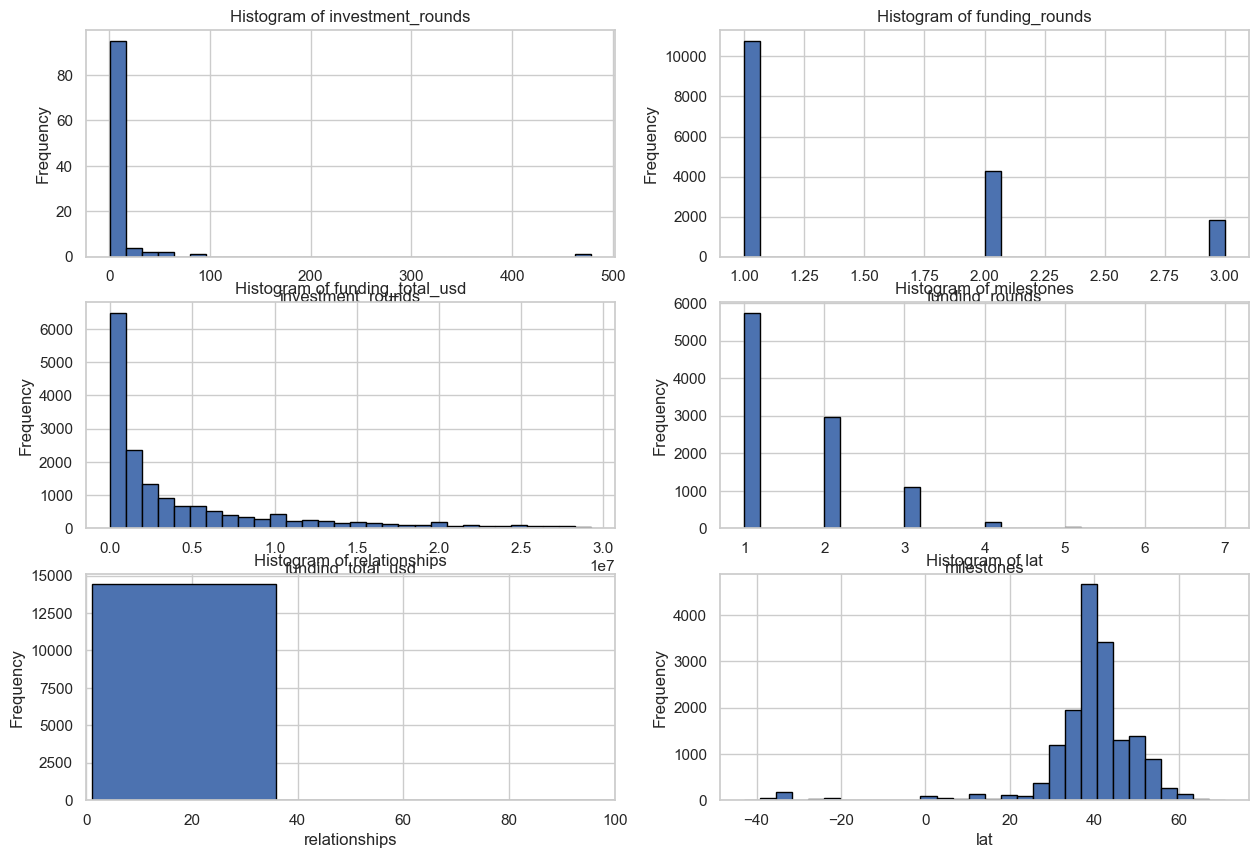

In [144]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    company[col].hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    if col == 'relationships':
        axes[i].set_xlim(0, 100)
plt.tight_layout()
plt.show()

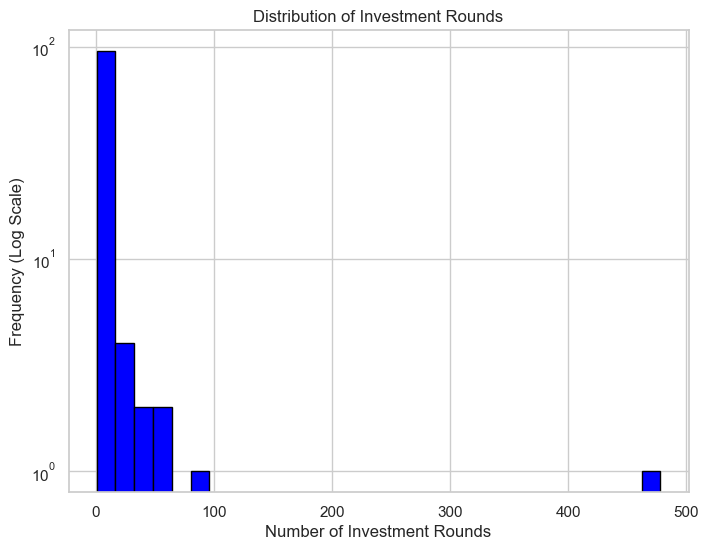

In [145]:

plt.figure(figsize=(8, 6))
plt.hist(company['investment_rounds'], bins=30, color='blue', edgecolor='black')

# Log scale to deal with skewness
plt.yscale('log')

plt.title('Distribution of Investment Rounds')
plt.xlabel('Number of Investment Rounds')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True)
plt.show()


### log scale transformation of 'funding_total_usd"

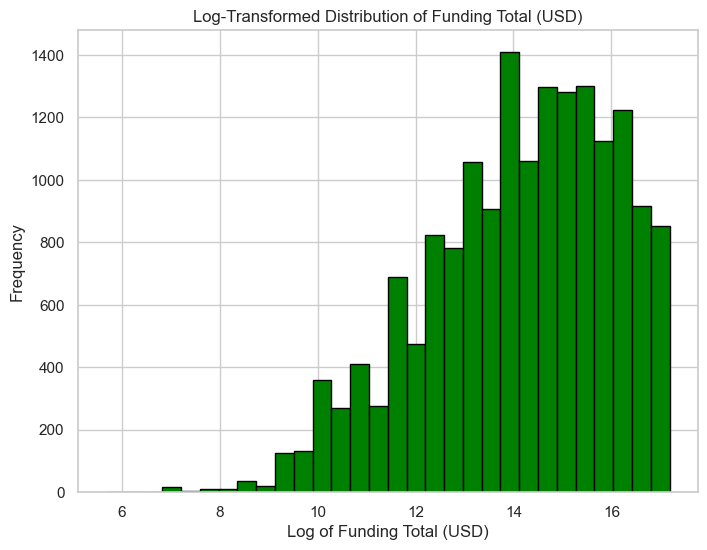

In [146]:
company['funding_total_usd'] = company['funding_total_usd'].replace(0, np.nan)

# Apply log transformation
company['log_funding_total_usd'] = np.log(company['funding_total_usd'])

# Fill NaN values in log-transformed column with 0
company['log_funding_total_usd'] = company['log_funding_total_usd'].fillna(0)

# Plot the log-transformed data for funding_total_usd
plt.figure(figsize=(8, 6))
plt.hist(company['log_funding_total_usd'], bins=30, color='green', edgecolor='black')
plt.title('Log-Transformed Distribution of Funding Total (USD)')
plt.xlabel('Log of Funding Total (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [147]:
status_mapping = {
    'ipo': 1,
    'acquired': 2,
    'closed': 3,
    'operating': 4
}
company['status'] = company['status'].map(status_mapping)

company['status'].value_counts()

status
4    14350
2     1339
3     1056
1      133
Name: count, dtype: int64

In [148]:
pearson_corr = company.corr(method='pearson')
spearman_corr = company.corr(method='spearman')

print("Pearson Correlation Coefficients:")
print(pearson_corr)

Pearson Correlation Coefficients:
                         category_code    status  founded_at  \
category_code                 1.000000 -0.047916   -0.088567   
status                       -0.047916  1.000000    0.185939   
founded_at                   -0.088567  0.185939    1.000000   
first_investment_at          -0.095838  0.381627    0.314103   
last_investment_at           -0.071550  0.083663    0.150359   
investment_rounds            -0.081795  0.033450    0.024394   
funding_rounds               -0.034247 -0.045789    0.020671   
funding_total_usd             0.005807 -0.166791   -0.289566   
milestones                    0.001576 -0.204145   -0.034665   
relationships                -0.009201 -0.123148   -0.092204   
lat                           0.026105 -0.014941   -0.036328   
lng                          -0.051860  0.077615    0.029214   
top_3_cities                 -0.040046 -0.033206    0.106083   
usa_non_usa                   0.052681 -0.075199   -0.039907   
ca_non

In [149]:
print("\nSpearman Correlation Coefficients:")
print(spearman_corr)


Spearman Correlation Coefficients:
                         category_code    status  founded_at  \
category_code                 1.000000 -0.050711   -0.147626   
status                       -0.050711  1.000000    0.234047   
founded_at                   -0.147626  0.234047    1.000000   
first_investment_at          -0.021158  0.351285    0.537033   
last_investment_at           -0.030666  0.126665    0.329610   
investment_rounds            -0.080114 -0.121413   -0.077753   
funding_rounds               -0.034259 -0.027393   -0.053028   
funding_total_usd             0.028642 -0.125611   -0.439351   
milestones                   -0.009600 -0.156727   -0.082225   
relationships                -0.040267 -0.100281   -0.116264   
lat                           0.011790  0.022085   -0.014048   
lng                          -0.041651  0.073729    0.016657   
top_3_cities                 -0.040046 -0.029452    0.120754   
usa_non_usa                   0.052681 -0.060851   -0.040794   
ca_n

#### We find the correlation coefficients greater than 0,2 because they are of interest

In [150]:
# Filter correlations greater than 0.2
pearson_filtered = pearson_corr[(pearson_corr > 0.2) & (pearson_corr != 1)].stack()
spearman_filtered = spearman_corr[(spearman_corr > 0.2) & (spearman_corr != 1)].stack()

print("Pearson Correlation Coefficients > 0.2:")
print(pearson_filtered)

Pearson Correlation Coefficients > 0.2:
status                   first_investment_at        0.381627
founded_at               first_investment_at        0.314103
first_investment_at      status                     0.381627
                         founded_at                 0.314103
                         last_investment_at         0.466707
last_investment_at       first_investment_at        0.466707
                         first_milestone_at_year    0.227684
                         last_milestone_at_year     0.227500
investment_rounds        ca_non_ca                  0.209821
funding_rounds           funding_total_usd          0.352567
                         milestones                 0.226425
                         log_funding_total_usd      0.364704
funding_total_usd        funding_rounds             0.352567
                         log_funding_total_usd      0.752539
milestones               funding_rounds             0.226425
                         last_milestone_at_ye

In [151]:
print("\nSpearman Correlation Coefficients > 0.2:")
print(spearman_filtered)


Spearman Correlation Coefficients > 0.2:
status                 founded_at               0.234047
                       first_investment_at      0.351285
                       first_funding_at_year    0.351192
                       last_funding_at_year     0.370861
founded_at             status                   0.234047
                                                  ...   
duration_days          closed_at_year           0.974155
                       isClosed                 0.622812
log_funding_total_usd  funding_rounds           0.381353
                       milestones               0.227614
                       relationships            0.336150
Length: 90, dtype: float64


#### Histogram of pearson and spearmann correlation coefficients.

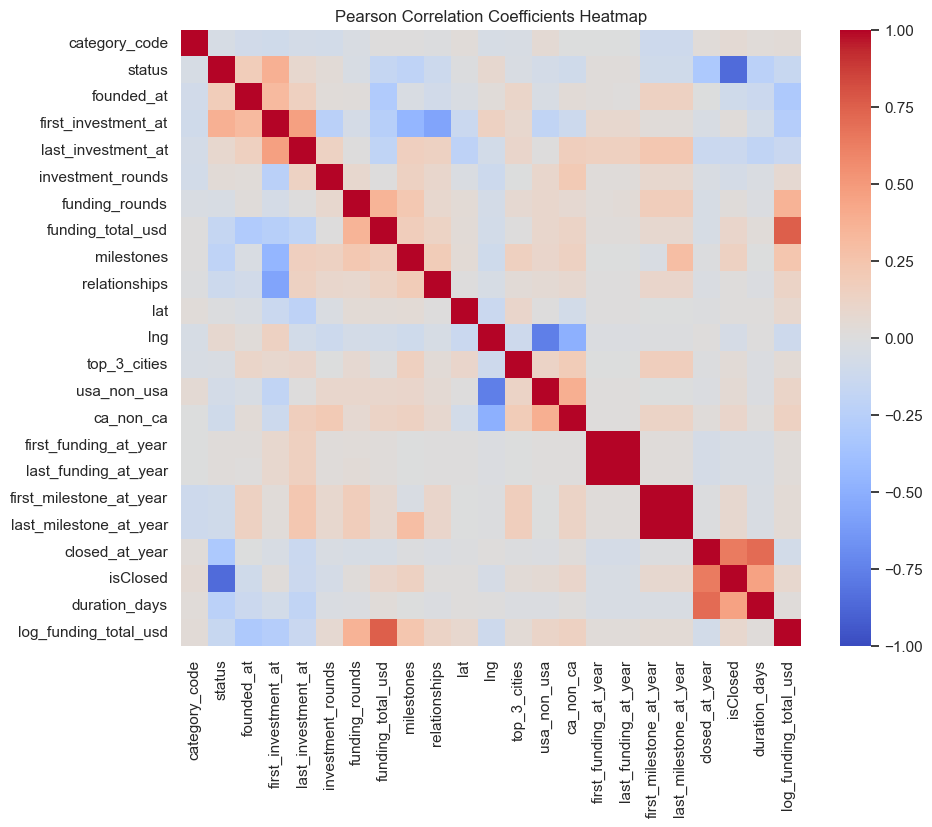

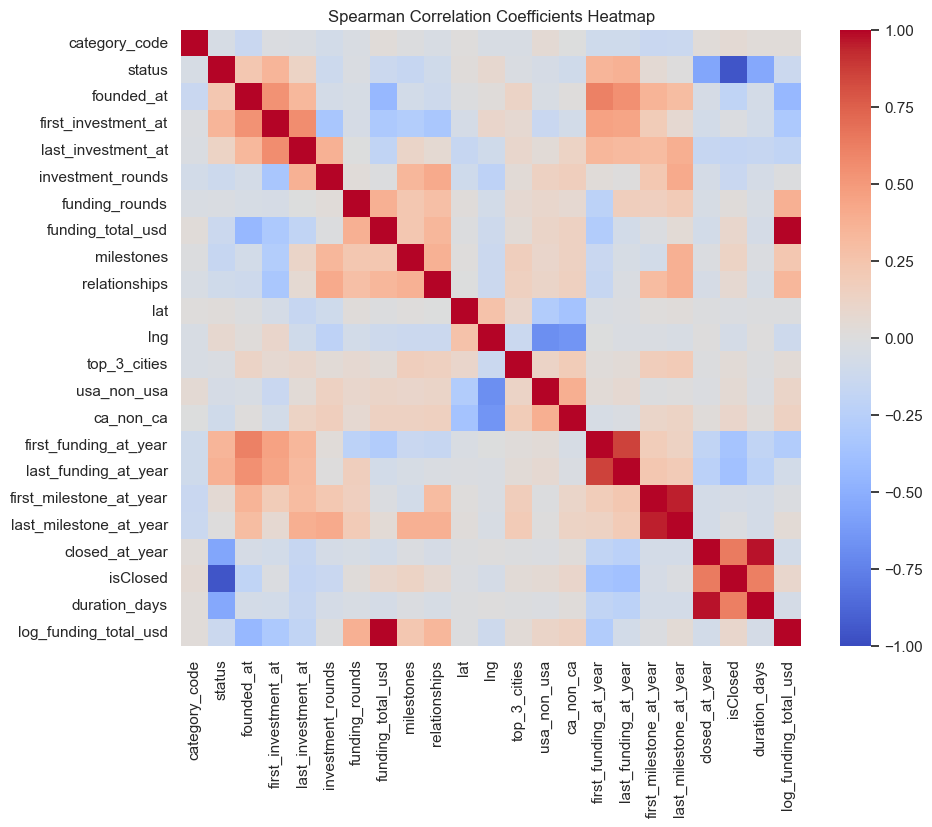

In [152]:
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficients Heatmap')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Coefficients Heatmap')
plt.show()

#### isClosed, closed_at_year, duration_days are highly negatively correlated with target column status in both of the correlations.

##### 'investment_rounds', 'funding_rounds', 'funding_total_usd','milestones', 'relationships', 'lat', 'lng', 'top_3_cities',
#####  'usa_non_usa', 'ca_non_ca', 'first_funding_at_year',
#####  'last_funding_at_year', 'first_milestone_at_year',
#####  'last_milestone_at_year'  Colums are somewhat correlated to each other, coefficient ranges are around 0,2 maximum

In [153]:
company.columns

Index(['category_code', 'status', 'founded_at', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng',
       'top_3_cities', 'usa_non_usa', 'ca_non_ca', 'first_funding_at_year',
       'last_funding_at_year', 'first_milestone_at_year',
       'last_milestone_at_year', 'closed_at_year', 'isClosed', 'duration_days',
       'log_funding_total_usd'],
      dtype='object')

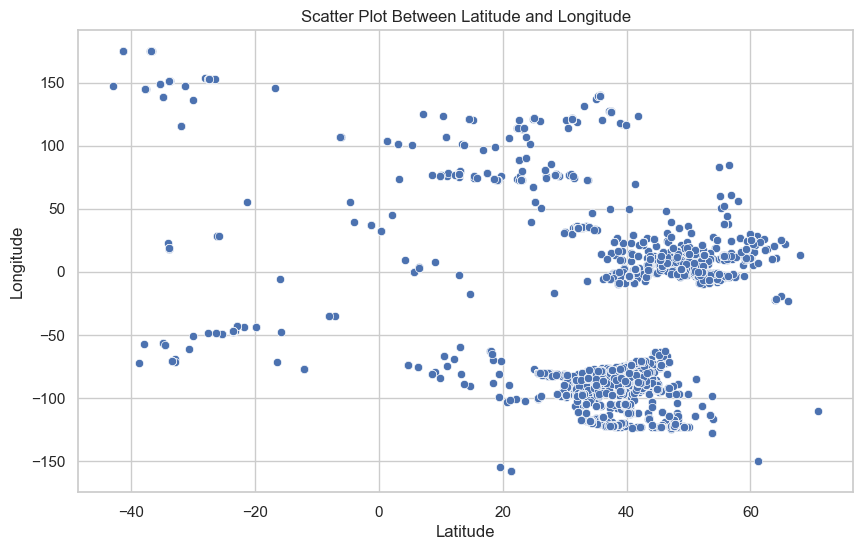

In [154]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='lng', data=company)
plt.title('Scatter Plot Between Latitude and Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

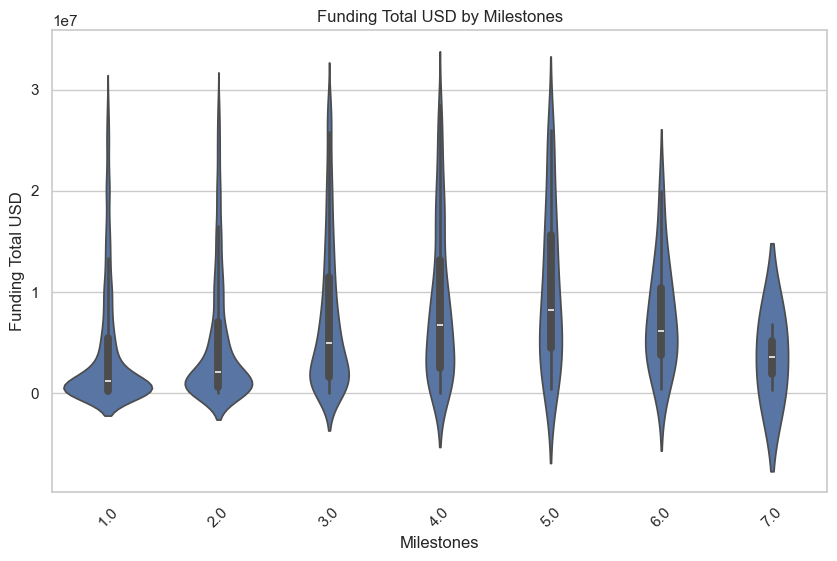

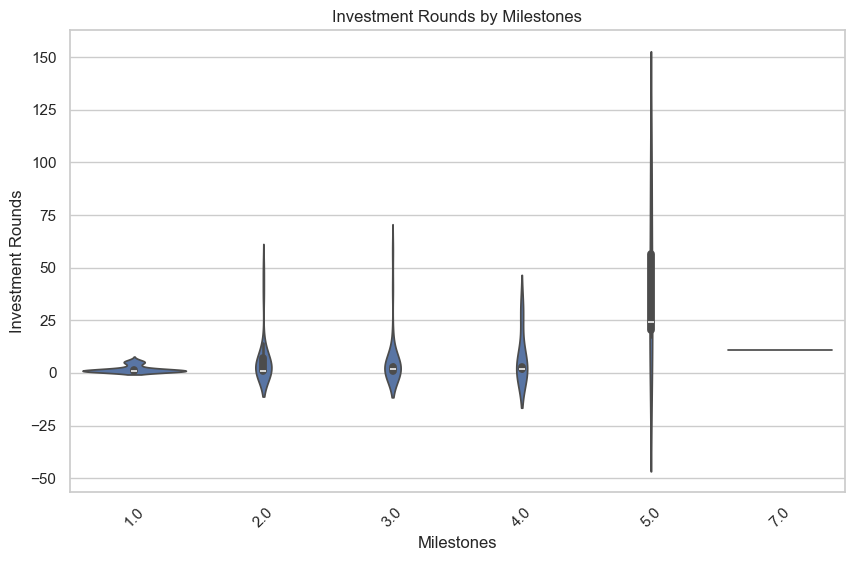

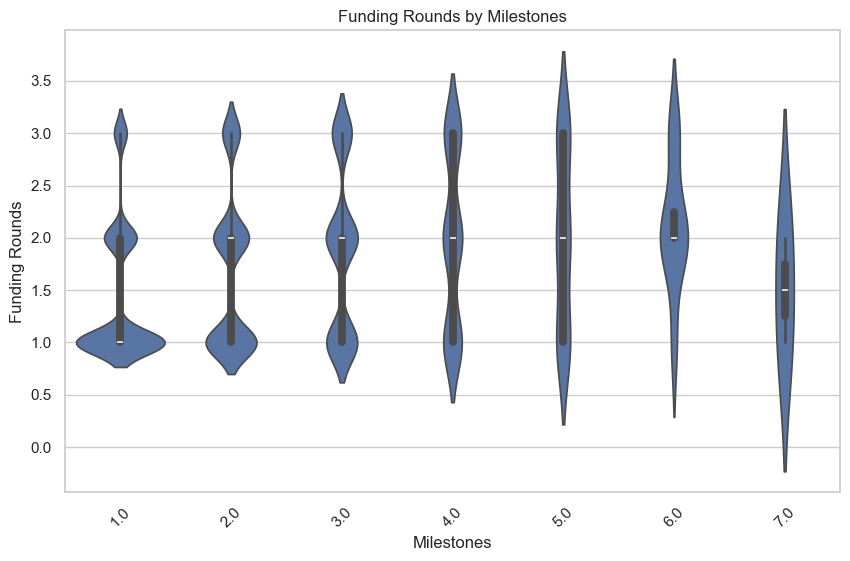

In [155]:

filtered_company_investment = company[company['investment_rounds'] <= 200]
filtered_company_funding = company[company['funding_rounds'] <= 10.0]
plt.figure(figsize=(10, 6))
sns.violinplot(x='milestones', y='funding_total_usd', data=company)
plt.title('Funding Total USD by Milestones')
plt.xlabel('Milestones')
plt.ylabel('Funding Total USD')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(x='milestones', y='investment_rounds', data=filtered_company_investment)
plt.title('Investment Rounds by Milestones')
plt.xlabel('Milestones')
plt.ylabel('Investment Rounds')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(x='milestones', y='funding_rounds', data=filtered_company_funding)
plt.title('Funding Rounds by Milestones')
plt.xlabel('Milestones')
plt.ylabel('Funding Rounds')
plt.xticks(rotation=45)
plt.show()


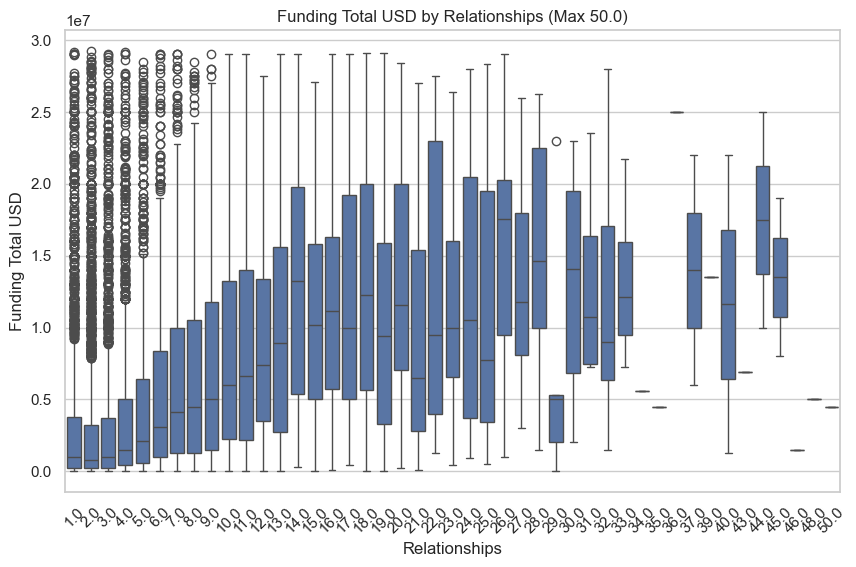

In [156]:

filtered_company_relationships = company[company['relationships'] <= 50.0]
plt.figure(figsize=(10, 6))
sns.boxplot(x='relationships', y='funding_total_usd', data=filtered_company_relationships)
plt.title('Funding Total USD by Relationships (Max 50.0)')
plt.xlabel('Relationships')
plt.ylabel('Funding Total USD')
plt.xticks(rotation=45)
plt.show()

In [157]:

columns_to_fill = ['investment_rounds', 'milestones', 'relationships', 'lat', 'lng']
for column in columns_to_fill:
    median_value = company[column].median()
    company[column].fillna(median_value, inplace=True)

In [158]:

company['first_investment_at'] = company['first_investment_at'].fillna(0).astype(int)
company['last_investment_at'] = company['last_investment_at'].fillna(0).astype(int)

In [159]:
company.isnull().sum()

category_code              0
status                     0
founded_at                 0
first_investment_at        0
last_investment_at         0
investment_rounds          0
funding_rounds             0
funding_total_usd          0
milestones                 0
relationships              0
lat                        0
lng                        0
top_3_cities               0
usa_non_usa                0
ca_non_ca                  0
first_funding_at_year      0
last_funding_at_year       0
first_milestone_at_year    0
last_milestone_at_year     0
closed_at_year             0
isClosed                   0
duration_days              0
log_funding_total_usd      0
dtype: int64

In [160]:

columns_with_missing_values = ['funding_rounds', 'funding_total_usd']
company[columns_with_missing_values] = company[columns_with_missing_values].fillna(0)
print(company.isnull().sum())

category_code              0
status                     0
founded_at                 0
first_investment_at        0
last_investment_at         0
investment_rounds          0
funding_rounds             0
funding_total_usd          0
milestones                 0
relationships              0
lat                        0
lng                        0
top_3_cities               0
usa_non_usa                0
ca_non_ca                  0
first_funding_at_year      0
last_funding_at_year       0
first_milestone_at_year    0
last_milestone_at_year     0
closed_at_year             0
isClosed                   0
duration_days              0
log_funding_total_usd      0
dtype: int64


In [161]:
company.drop(['lat','lng'], axis=1, inplace=True)

In [162]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16878 entries, 13 to 196552
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category_code            16878 non-null  int64  
 1   status                   16878 non-null  int64  
 2   founded_at               16878 non-null  int32  
 3   first_investment_at      16878 non-null  int64  
 4   last_investment_at       16878 non-null  int64  
 5   investment_rounds        16878 non-null  float64
 6   funding_rounds           16878 non-null  float64
 7   funding_total_usd        16878 non-null  float64
 8   milestones               16878 non-null  float64
 9   relationships            16878 non-null  float64
 10  top_3_cities             16878 non-null  int64  
 11  usa_non_usa              16878 non-null  int64  
 12  ca_non_ca                16878 non-null  int64  
 13  first_funding_at_year    16878 non-null  int64  
 14  last_funding_at_year     

In [163]:
cm = company.copy()
cb = company.drop('status',axis=1)

In [164]:
print(cm.columns)
print(cb.columns)

Index(['category_code', 'status', 'founded_at', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'top_3_cities',
       'usa_non_usa', 'ca_non_ca', 'first_funding_at_year',
       'last_funding_at_year', 'first_milestone_at_year',
       'last_milestone_at_year', 'closed_at_year', 'isClosed', 'duration_days',
       'log_funding_total_usd'],
      dtype='object')
Index(['category_code', 'founded_at', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'top_3_cities',
       'usa_non_usa', 'ca_non_ca', 'first_funding_at_year',
       'last_funding_at_year', 'first_milestone_at_year',
       'last_milestone_at_year', 'closed_at_year', 'isClosed', 'duration_days',
       'log_funding_total_usd'],
      dtype='object')


#### Applying PCA before doing feature selection

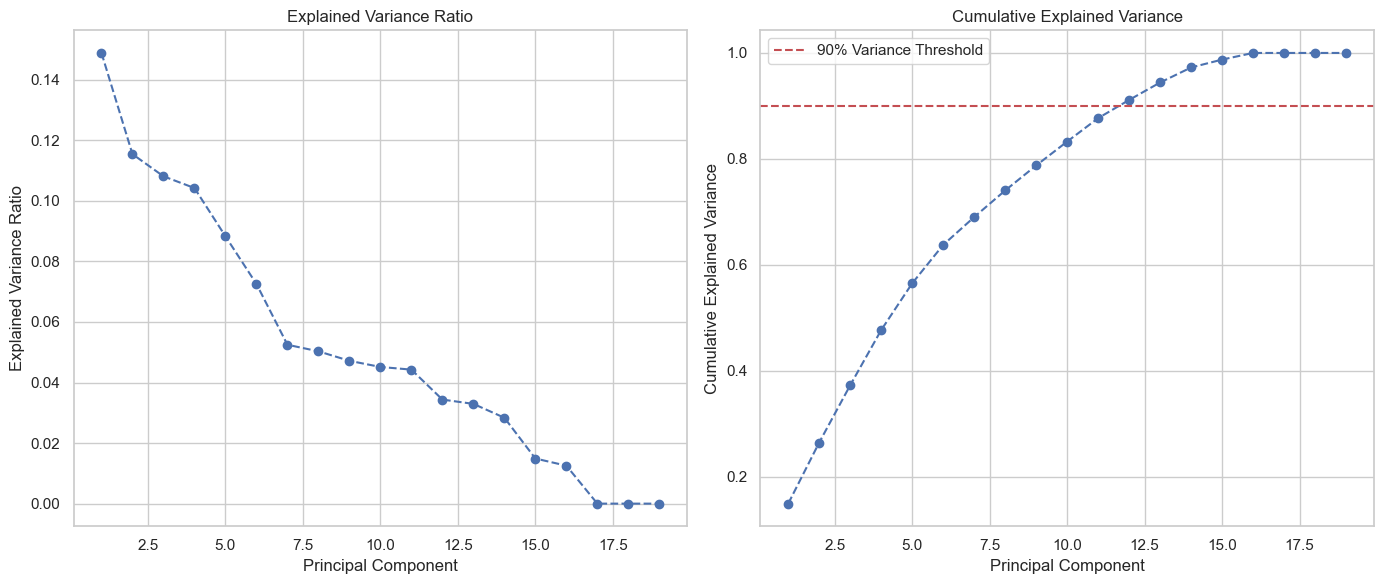

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = cb.drop(columns=['isClosed'])
y = cb['isClosed']

binary_columns = [col for col in X.columns if set(X[col].unique()) > {0, 1}]
columns_to_scale = [col for col in X.columns if col not in binary_columns]

# Scale only the specified columns
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

pca = PCA()
pca_data = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(14, 6))

# Explained Variance Ratio
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

# Cumulative Explained Variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [166]:
correlation_with_target = company.corr(method='spearman')[['status']]
selected_features = correlation_with_target[abs(correlation_with_target) > 0.1].index
data_selected_binary = company[selected_features]
print(data_selected_binary.columns)

Index(['category_code', 'status', 'founded_at', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'top_3_cities',
       'usa_non_usa', 'ca_non_ca', 'first_funding_at_year',
       'last_funding_at_year', 'first_milestone_at_year',
       'last_milestone_at_year', 'closed_at_year', 'isClosed', 'duration_days',
       'log_funding_total_usd'],
      dtype='object')


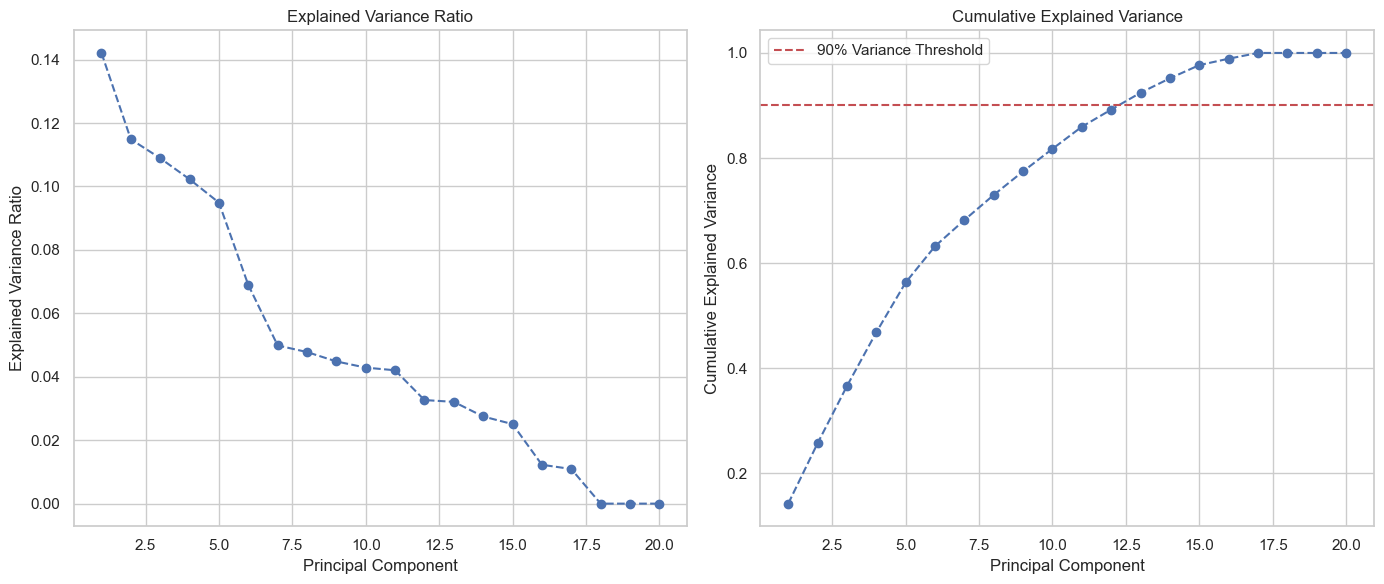

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = company.drop(columns=['status'])
y = company['status']

binary_columns = [col for col in X.columns if set(X[col].unique()) > {0, 1}]
columns_to_scale = [col for col in X.columns if col not in binary_columns]

# Scale only the specified columns
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

pca = PCA()
pca_data = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(14, 6))

# Explained Variance Ratio
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

# Cumulative Explained Variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Our Elbow point is above the 0.9 treshold around 1.0, meaning there is high correlation between features and first principal component explains the majority of the variance.

In [168]:
print("Number of components:", pca.n_components_)


Number of components: 20


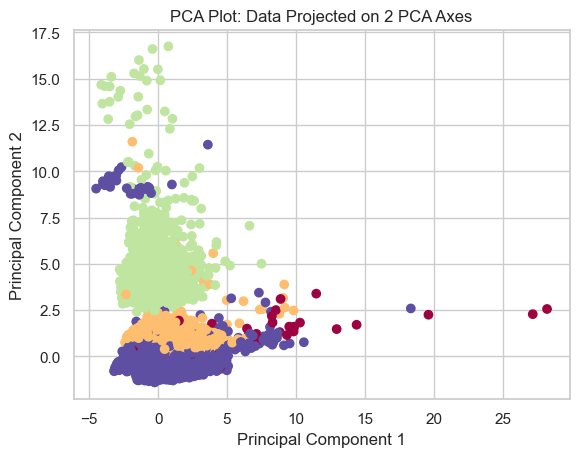

In [169]:

pca_1 = pca_data[:, 0]
pca_2 = pca_data[:, 1]
target = company["status"]
plt.scatter(pca_1, pca_2, c=target, cmap=plt.cm.Spectral)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot: Data Projected on 2 PCA Axes')
plt.show()


####  Feature Selection Based on Correlation with Target Variable

In [170]:
correlation_with_target = company.corr(method='spearman')[['status']]
selected_features = correlation_with_target[abs(correlation_with_target) > 0.1].index
data_selected = company[selected_features]
print(data_selected.columns)


Index(['category_code', 'status', 'founded_at', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'top_3_cities',
       'usa_non_usa', 'ca_non_ca', 'first_funding_at_year',
       'last_funding_at_year', 'first_milestone_at_year',
       'last_milestone_at_year', 'closed_at_year', 'isClosed', 'duration_days',
       'log_funding_total_usd'],
      dtype='object')


In [171]:
company.head()

,category_code,status,founded_at,first_investment_at,last_investment_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,...,usa_non_usa,ca_non_ca,first_funding_at_year,last_funding_at_year,first_milestone_at_year,last_milestone_at_year,closed_at_year,isClosed,duration_days,log_funding_total_usd
13,1,2,2007,0,0,1.0,1.0,5000000.0,3.0,14.0,...,1,1,2008,2008,2008,2012,0,1,0,15.424948
20,0,4,2003,0,0,1.0,3.0,10125293.0,1.0,6.0,...,1,0,2011,2012,2010,2010,0,0,0,16.130547
26,0,4,2003,0,0,1.0,1.0,250000.0,1.0,2.0,...,0,0,2003,2003,2007,2007,0,0,0,12.429216
32,0,4,2010,0,0,1.0,1.0,100000.0,1.0,3.0,...,1,0,2011,2011,2010,2010,0,0,0,11.512925
36,0,4,2006,0,0,1.0,2.0,11300000.0,1.0,2.0,...,1,0,2011,2012,0,0,0,0,0,16.240313


In [172]:
company.to_csv('company_cleaned.csv', index=False)
cb.to_csv('cb.csv', index=False)
cm.to_csv('cm.csv', index=False)

In [173]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['founded_at', 'first_investment_at', 'last_investment_at', 'investment_rounds',
                        'funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
                        'first_funding_at_year', 'last_funding_at_year', 'first_milestone_at_year',
                        'last_milestone_at_year', 'closed_at_year', 'duration_days', 'log_funding_total_usd']

scaler = MinMaxScaler()
company[features_to_normalize] = scaler.fit_transform(company[features_to_normalize])
cb[features_to_normalize] = scaler.fit_transform(cb[features_to_normalize])

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

X_cb = cb.drop('isClosed', axis=1)
y_cb = cb['isClosed']
X_cb_train, X_cb_test, y_cb_train, y_cb_test = train_test_split(X_cb, y_cb, test_size=0.2, random_state=42)

logistic_regression_pipeline = Pipeline([
    ('logistic_regression', LogisticRegression())
])

logistic_regression_pipeline.fit(X_cb_train, y_cb_train)

y_cb_pred = logistic_regression_pipeline.predict(X_cb_test)

accuracy_logistic = accuracy_score(y_cb_test, y_cb_pred)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")


company['isClosed_pred'] = logistic_regression_pipeline.predict(cb.drop('isClosed', axis=1))


X_company = company.drop('status', axis=1)
y_company = company['status']
X_company_train, X_company_test, y_company_train, y_company_test = train_test_split(X_company, y_company, stratify=y,test_size=0.2, random_state=42)

random_forest_pipeline = Pipeline([
    ('random_forest', RandomForestClassifier())
])


random_forest_pipeline.fit(X_company_train, y_company_train)

y_company_pred = random_forest_pipeline.predict(X_company_test)

accuracy_random_forest = accuracy_score(y_company_test, y_company_pred)
print(f"Random Forest Accuracy: {accuracy_random_forest}")

Logistic Regression Accuracy: 0.9212085308056872
Random Forest Accuracy: 0.9925947867298578


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2916
           1       0.93      0.45      0.61       460

    accuracy                           0.92      3376
   macro avg       0.93      0.72      0.78      3376
weighted avg       0.92      0.92      0.91      3376

Logistic Regression Confusion Matrix:
[[2901   15]
 [ 251  209]]


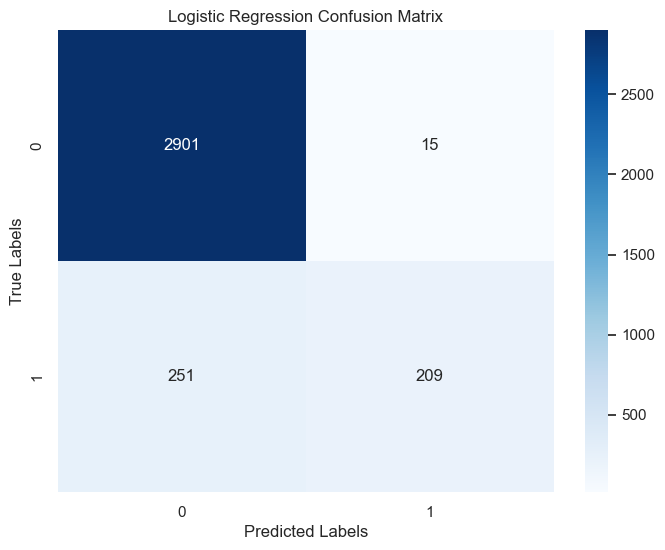

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.15      0.26        27
           2       1.00      0.99      1.00       268
           3       0.99      1.00      1.00       211
           4       0.99      1.00      1.00      2870

    accuracy                           0.99      3376
   macro avg       1.00      0.79      0.81      3376
weighted avg       0.99      0.99      0.99      3376

Random Forest Confusion Matrix:
[[   4    0    0   23]
 [   0  266    2    0]
 [   0    0  211    0]
 [   0    0    0 2870]]


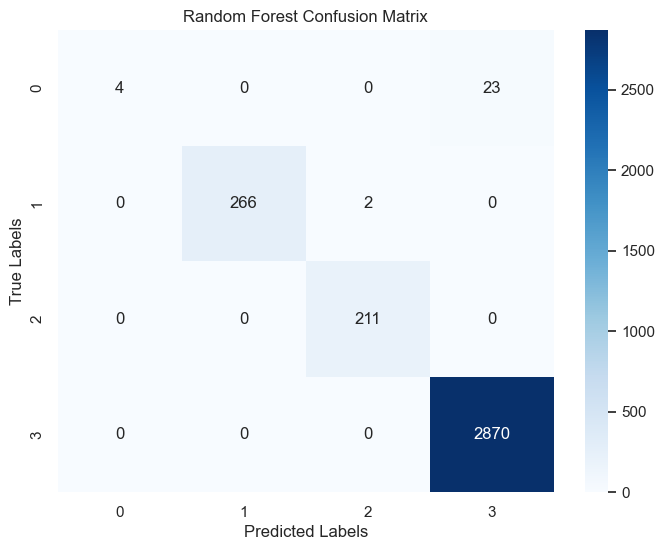

In [178]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Logistic Regression Classification Report:")
print(classification_report(y_cb_test, y_cb_pred))

cm_logistic = confusion_matrix(y_cb_test, y_cb_pred)
print("Logistic Regression Confusion Matrix:")
print(cm_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Random Forest Classification Report:")
print(classification_report(y_company_test, y_company_pred))

cm_random_forest = confusion_matrix(y_company_test, y_company_pred)
print("Random Forest Confusion Matrix:")
print(cm_random_forest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_random_forest, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2916
           1       0.93      0.45      0.61       460

    accuracy                           0.92      3376
   macro avg       0.93      0.72      0.78      3376
weighted avg       0.92      0.92      0.91      3376

Logistic Regression Confusion Matrix:
[[2901   15]
 [ 251  209]]


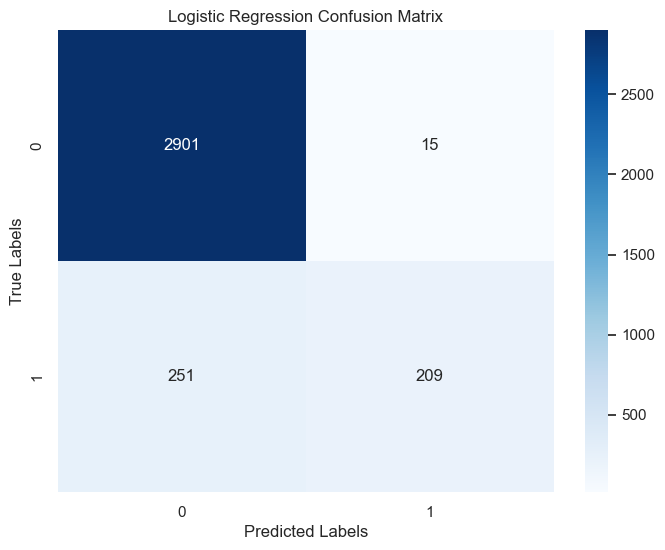

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.15      0.26        27
           2       1.00      0.99      1.00       268
           3       0.99      1.00      1.00       211
           4       0.99      1.00      1.00      2870

    accuracy                           0.99      3376
   macro avg       1.00      0.79      0.81      3376
weighted avg       0.99      0.99      0.99      3376

Random Forest Confusion Matrix:
[[   4    0    0   23]
 [   0  266    2    0]
 [   0    0  211    0]
 [   0    0    0 2870]]


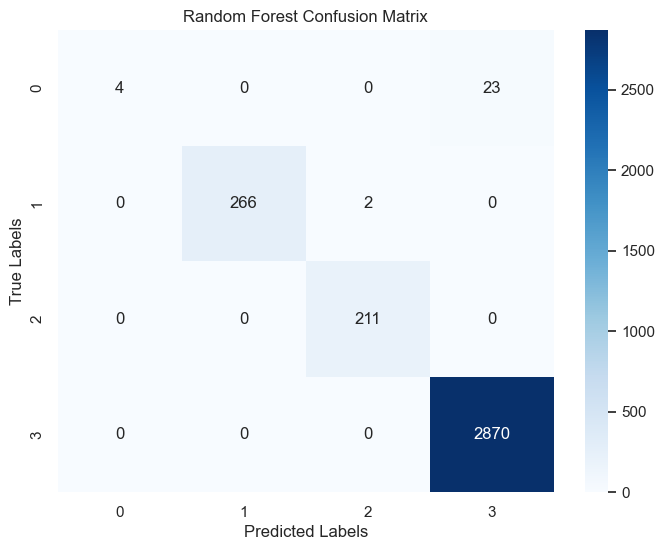

In [179]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Logistic Regression Classification Report:")
print(classification_report(y_cb_test, y_cb_pred))

cm_logistic = confusion_matrix(y_cb_test, y_cb_pred)
print("Logistic Regression Confusion Matrix:")
print(cm_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Random Forest Classification Report:")
print(classification_report(y_company_test, y_company_pred))

cm_random_forest = confusion_matrix(y_company_test, y_company_pred)
print("Random Forest Confusion Matrix:")
print(cm_random_forest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_random_forest, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()